# Assignment 2

**Handin in Peergrade**: *Monday*, October 21, 2019, 23:59<br>
**Peergrading deadline**: *Friday*, October 25, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, October 27, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

### Week 4

In [131]:
import re, os
def get_alliances(char, faction=None):
    """Return list of alliances for Marvel character."""
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("/Users/alderik/Documents/School/College/DIS/caobd_f19/data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("/Users/alderik/Documents/School/College/DIS/caobd_f19/data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"alliances[\w\W]+?\|.+=", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]

def get_universe():
    directory = "/Users/alderik/Documents/School/College/DIS/caobd_f19/data/"
    marvel_universe = []
    for faction in ["heroes", "ambiguous", "villains"]:
        faction_chars = [c[:-4] for c in os.listdir("/Users/alderik/Documents/School/College/DIS/caobd_f19/data/%s" % faction)]
        for i in faction_chars:
            marvel_universe.append(i)
            
    marvel_universe.sort()
    return marvel_universe

def get_teams():
    """Returns list of all teams"""
    all_teams = []
    
    chars = get_universe()
    for i in chars:
        teams = get_alliances(i)
        while len(teams)>0:
            if teams[0] not in all_teams:
                all_teams.append(teams[0])
                teams.remove(teams[0])
            else:
                teams.remove(teams[0])
    
    all_teams.sort()
    return all_teams

import pandas as pd
def get_vector_quick(char, all_teams):
    faction = None
    char_alliances = get_alliances(char, faction)
    alliance_vector = []
    for i in all_teams:
        count = 0
        for j in char_alliances:
            if i==j:
                count=1
                alliance_vector.append(count)
            else:
                alliance_vector.append(count)
        
    return alliance_vector

def get_matrix():
    all_chars = get_universe()
    all_teams = get_teams()
    char_vecs = []
    
    for i in all_chars:
        char_vecs.append(get_vector_quick(i,all_teams))
        
    return char_vecs

def get_faction(char):
    faction = None
    ans = ''
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("/Users/alderik/Documents/School/College/DIS/caobd_f19/data/%s" % faction)]
            if char in faction_chars:
                ans = faction
                break
    return ans
    
def hero_vil_ambig_matrix():
    all_chars = get_universe()
    faction_id = []
    for i in all_chars:
        faction = get_faction(i)
        if faction =='villains':
            faction_id.append(1)
        elif faction =='heroes':
            faction_id.append(0)
        else:
            faction_id.append(2)
    return faction_id

In [132]:
char_alliance_vec = get_matrix()
all_teams = get_teams()
all_chars = get_universe()
df = pd.DataFrame(char_alliance_vec, columns=all_teams, index=all_chars) 
target_array = hero_vil_ambig_matrix()
df['target'] = target_array #adds column of factions
df = df[df.target != 2]

In [133]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y = df.target
df = df.drop("target",1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
    
ber = BernoulliNB()
model = ber.fit(X_train, y_train)
predictions = ber.predict(X_test)
print("Score:", model.score(X_test, y_test))

(857, 622) (857,)
(857, 622) (857,)
Score: 0.79463243873979


> **Ex. 4.3.2**: Implement cross validation. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. It's important that you comment on the result.

In [134]:
X = df.to_numpy() # create an array
# Create another array
kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


In [135]:
test_scores = []
train_scores = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ber = BernoulliNB()
    model = ber.fit(X_train, y_train)
    predictions = ber.predict(X_test)
    test_scores.append(model.score(X_test, y_test))
    train_scores.append(model.score(X_train, y_train))
    #print("Score:", model.score(X_test, y_test))

print(test_scores)
print(train_scores)

[0.8081395348837209, 0.813953488372093, 0.813953488372093, 0.8372093023255814, 0.7894736842105263, 0.8947368421052632, 0.8304093567251462, 0.783625730994152, 0.7426900584795322, 0.8070175438596491]
[0.8372243839169909, 0.8378728923476005, 0.8378728923476005, 0.8346303501945526, 0.8399222294232016, 0.8379779650032404, 0.8347375243033053, 0.8418664938431627, 0.8444588464031109, 0.8431626701231367]


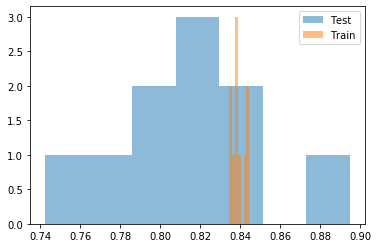

In [136]:
import random
import numpy
from matplotlib import pyplot

x = test_scores
y = train_scores

bins = 7

pyplot.hist(x, bins, alpha=0.5, label='Test')
pyplot.hist(y, bins, alpha=0.5, label='Train')
pyplot.legend(loc='upper right')
pyplot.show()

<div class="alert alert-block alert-info">
<b>ANS 4.3.2 </b>   
    The train scores are on average more accurate and vary a lot less. Meaning there might still be overfitting. 
</div>

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data.
* Create a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments.
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

In [149]:
def get_teams_vector(char, faction=None, verbose=True):
    char_alliances = get_alliances(char)
    tmp = [1 if team in char_alliances else 0 for team in all_teams]
    
    if verbose:
        print(sum(tmp))
        
    return tmp

In [150]:
def get_ambig_alliance_matrix():
    targ_array = []
    sort_vec = []
    team_matrix = []
    
    for faction in ["ambiguous"]: # for each faction
        for char in os.listdir("../data/%s" % faction): # for each character in faction
            char = char[:-4] # remove .txt file extension
            
            team_vec = get_teams_vector(char, verbose=False)
            if sum(team_vec) != 0:
                team_matrix.append(team_vec)
                targ_array.append(char) # target array            
            
    # sort the matrix by character name
    team_matrix = np.matrix(team_matrix)
    team_matrix = team_matrix[np.argsort(targ_array, axis=0)]
    
    # sort target array
    targ_array.sort()
    
    return targ_array, team_matrix, sort_vec

In [151]:
model = ber.fit(X_train, y_train)
ambig_target, ambig_matrix, sort_vec = get_ambig_alliance_matrix() 
ambig_mt = np.array(ambig_matrix)
villain_prob = model.predict_proba(ambig_mt) # estimating the probability that each character is a villain 

heroness = []

for i in range(len(villain_prob)):
    heroness.append(villain_prob[i][0])

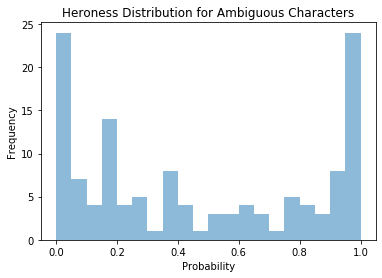

In [165]:
pyplot.hist(heroness, alpha =0.5, bins=20)
pyplot.xlabel("Probability")
pyplot.ylabel("Frequency")
pyplot.title("Heroness Distribution for Ambiguous Characters")
pyplot.show()

<div class="alert alert-block alert-info">
<b>ANS 4.4.1 </b>   
There is a low frequency of characters that aren't zero percent a hero or almost 100% a hero. Therefore, these ambiguous character are not that ambiguous because you could easily classify the majority as hero or villain. 

</div>

### Week 5

>**Ex. 5.1.3**: Print the maximum entropy path of a decision tree.
>
>1. Implement the following pseudocode and print the output:<br><br>
>Step 1. Find `team` that gives lowest split entropy for `data`. Print `team`.<br>
>Step 2. Split `data` on `team`, to produce `data0` and `data1`. Print the entropy of each, as well as their weighted avg. entropy.<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.2.3.1.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How splits are there? Do you notice anything interesting about the final splits? Why do we choose to stop splitting before `data` get smaller than 5?
>3. Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of the order of splits you just printed (a comment is fine)?

**Ans. 5.1.3.1**

In [200]:
char_alliance_vec = get_matrix()
all_teams = get_teams()
all_chars = get_universe()
df = pd.DataFrame(char_alliance_vec, columns=all_teams, index=all_chars) 

#getting rid of ambig characters
target_array = hero_vil_ambig_matrix()
df['faction'] = target_array #adds column of factions
df = df[df.faction != 2] #filter for only heros and villains

In [201]:
#gets rid of teams with no characters
def delete_cols(df): 
    for i in df.columns:
        if sum(df[i]) == 0:
            df = df.drop(i, 1)
    return df

df = delete_cols(df)
df

,A-Force,A-Next,A.R.M.O.R.,AXIS (comics),Acolytes (comics),Acts of Vengeance,Advanced Idea Mechanics,Advanced Idea Mechanics#Avengers Idea Mechanics,Age of Apocalypse,Agency X,...,Yancy Street Gang,Young Allies,Young Allies (Marvel Comics),Young Allies (Marvel Comics)#Counter-Earth,Young Allies (Marvel Comics)#Heroes Reborn,Young Allies (Marvel Comics)#Heroic Age,Young Avengers,Young X-Men,Zodiac (comics),faction
Abigail Brand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abomination (comics),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Abraham Cornelius,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Absalom (comics),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Absorbing Man,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiak (comics),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Zombie (comics),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Zvezda Dennista,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [202]:
#get rid of characters with no partners
def drop_loners(df):
    for x in df.index:
        alliances = get_alliances(x)
        if len(alliances)==0:
            df = df.drop(x)
    return df
df = drop_loners(df)

In [203]:
import numpy as np

def entropy(arr):
    ent = 0
    for val in arr:
        if val>0:  
            ent += val * np.log2(val)
    return -1*ent

In [204]:
def weighted_entropy(df,team):
    df0 = df[df[team]==0]
    df1 = df[df[team]==1]
    # Not in Team
    per_1_not = sum(df0.faction)/len(df0.faction)
    per_0_not = 1-per_1_not
    p0=[per_0_not, per_1_not]

    # In Team
    per_1 = sum(df1.faction)/len(df1.faction)
    per_0 = 1-per_1
    p1=[per_0, per_1]
    
    #weights
    t = len(df0)
    not_t = len(df1)
    total = len(df)
    
    w_entropy = (t/total)*entropy(p0)+(not_t/total)*entropy(p1)
    return w_entropy

In [205]:
entropies = []
entropies_2d = {}
for i in df.columns:
    entropies.append(weighted_entropy(df,str(i)))
    entropies_2d[i] = weighted_entropy(df,str(i))

In [206]:
entropies_2d.pop('faction', None)

res =  [key for key in entropies_2d if 
        all(entropies_2d[temp] >= entropies_2d[key] 
        for temp in entropies_2d)] 
res[0]

'Avengers (comics)'

In [207]:
df[res]

,Avengers (comics)
Abigail Brand,0
Abomination (comics),0
Abraham Cornelius,0
Absorbing Man,0
Adam Warlock,0
...,...
Yo-Yo Rodriguez,0
Yondu,1
Yukio (comics),0
Zeke Stane,0


In [208]:
df0 = df[df['Avengers (comics)']==0]
df1 = df[df['Avengers (comics)']==1]

In [209]:
# Not in Team
per_1_not = sum(df0.faction)/len(df0.faction)
per_0_not = 1-per_1_not
p0=[per_0_not, per_1_not]

# In Team
per_1 = sum(df1.faction)/len(df1.faction)
per_0 = 1-per_1
p1=[per_0, per_1]

In [210]:
print("The entropy of non Avengers subset is %f" %entropy(p0))
print("The entropy of Avengers subset is %f" %entropy(p1))

The entropy of non Avengers subset is 0.993116
The entropy of Avengers subset is 0.304587


In [211]:
weighted_entropy(df,'Avengers (comics)')

0.9353200324332954

In [212]:
dftest = df
entropies_2d.pop('faction', None)
entropies_2d_test = entropies_2d
split = 0
#make copy of df to play with it keep overwriting
while len(dftest)>5:
    print(len(dftest))
    res =  [key for key in entropies_2d_test if 
        all(entropies_2d_test[temp] >= entropies_2d_test[key] 
        for temp in entropies_2d_test)] 
    
    entropies_2d_test.pop(res[0])
    
    print("Split %d: " %split)
    print(res[0])
    print("------------")
    df0 = dftest[dftest[res[0]]==0]
    # Not in Team
    per_1_not = sum(df0.faction)/len(df0.faction)
    per_0_not = 1-per_1_not
    p0=[per_0_not, per_1_not]
    
    df1 = dftest[dftest[res[0]]==1]
    # In Team
    
    per_1 = sum(df1.faction)/len(df1.faction)
    per_0 = 1-per_1
    p1=[per_0, per_1]
    
    e0 = entropy(p0)
    e1 = entropy(p1)
    w = weighted_entropy(dftest,res[0])
    
    if entropy(p0) > entropy(p1):
        dftest = df0
        print("\tdata0:")
        print("\t\tsize: %d" %len(df0))
        print("  -->\t\tEntropy: %f" %e0)
        print("\tdata1:")
        print("\t\tsize: %d" %len(df1))
        print("\t\tEntropy: %f" %e1)
        print("\tAverage entropy: %f\n" %w)
    else:
        dftest = df1
        print("\tdata0:")
        print("\t\tsize: %d" %len(df0))
        print("\t\tEntropy: %f" %e0)
        print("\tdata1:")
        print("\t\tsize: %d" %len(df1))
        print("  -->\t\tEntropy: %f" %e1)
        print("\tAverage entropy: %f\n" %w)
    split+=1
    
    #need to deal with factions becoming zero

1096
Split 0: 
Avengers (comics)
------------
	data0:
		size: 1004
  -->		Entropy: 0.993116
	data1:
		size: 92
		Entropy: 0.304587
	Average entropy: 0.935320

1004
Split 1: 
X-Men
------------
	data0:
		size: 926
  -->		Entropy: 0.977808
	data1:
		size: 78
		Entropy: 0.435613
	Average entropy: 0.935686

926
Split 2: 
Masters of Evil
------------
	data0:
		size: 869
  -->		Entropy: 0.989036
	data1:
		size: 57
		Entropy: 0.127419
	Average entropy: 0.935999

869
Split 3: 
Sinister Six
------------
	data0:
		size: 844
  -->		Entropy: 0.993180
	data1:
		size: 25
		Entropy: -0.000000
	Average entropy: 0.964608

844
Split 4: 
New Warriors
------------
	data0:
		size: 819
  -->		Entropy: 0.987652
	data1:
		size: 25
		Entropy: -0.000000
	Average entropy: 0.958397

819
Split 5: 
Defenders (comics)
------------
	data0:
		size: 794
  -->		Entropy: 0.983460
	data1:
		size: 25
		Entropy: 0.795040
	Average entropy: 0.977709

794
Split 6: 
X-Force
------------
	data0:
		size: 779
  -->		Entropy: 0.978

<div class="alert alert-block alert-info">
<b>ANS 5.1.3 </b>  

There are 17 splits. The final split goes from size 669 to size 2. The final split also has an entropy of 1. We chose to stop splitting before the data got smaller than 5 because the entropy became 1 on the 17th split. 
</div>

In [217]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
target = df.faction
team_matrix = df.drop("faction",1)
dt.fit(df, target)

features = np.argsort(np.array(dt.feature_importances_))[::-1]
top_feats = features[:10]

print("The 10 most important feature are: ")

for i in top_feats:
    print("%s" % all_teams[i])

The 10 most important feature are: 
X-Terminators
Guardians of the Galaxy (1969 team)
Green Goblin
Great Lakes Avengers
Grapplers (comics)
Goodman, Lieber, Kurtzberg & Holliway
Godzilla (comics)#Marvel Comics
God Squad (comics)
Goblin (Marvel Comics)
Gladiators (comics)


<div class="alert alert-block alert-info">
<b>ANS 5.1.3 </b>  

Above is the list of features.
This does not line up with our order of splits. The sklearn decision tree algorithm might have found better splits than us.
    
</div>

### Week 6

> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

Edges: [(1, 2), (1, 3), (1, 6), (2, 6)] Nodes: [1, 2, 6, 3]


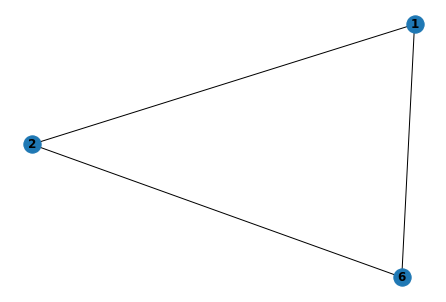

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 6])
G.add_edges_from([(1, 2), (1, 3), (1, 6), (2, 6)])

print("Edges:", G.edges, "Nodes:", G.nodes)

# removing node and plotting
G.remove_node(3)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

<div class="alert alert-block alert-info">
<b>ANS 6.1.3 #1</b>  

1. A BA network returns a random graph according to the Barabási–Albert preferential attachment model. A graph of n nodes is grown by attaching new nodes each with m edges that are preferentially attached to existing nodes with high degree.
    
    
</div>

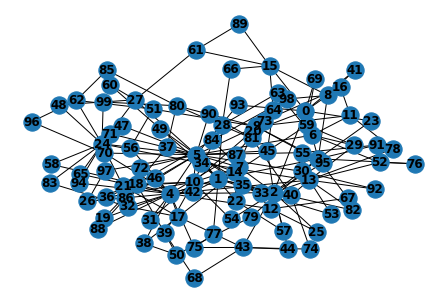

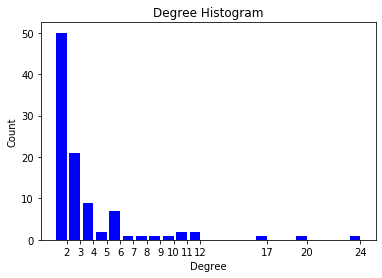

In [7]:
import collections
import matplotlib.pyplot as plt
import networkx as nx 

# making and plotting BA network
ba = nx.barabasi_albert_graph(100, 2)
nx.draw(ba, with_labels=True, font_weight='bold')
plt.show()

degree_sequence = sorted([d for n, d in ba.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

# plotting degree histogram
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

<div class="alert alert-block alert-info">
<b>ANS 6.1.3 #'s 5 and 6</b>  

5. The main difference I notice when comparing to the ER network is in the degree histogram. In the ER graph, you can see that the most populated group is at degree 10, with the majority being around there too. In the BA one on the other hand, you can see that the most populated group is of degree one. This means that the vertices of the ER graph are connected by edges to a much larger amount of other edges on average. 

6. Yes, we could talk about the sparsity of the two graphs. The BA graph is much more sparse than the ER graph. 
    
    
</div>

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

In [222]:
import networkx as nx
def get_partners(char, faction=None):
    """Return list of alliances for Marvel character."""
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("/Users/alderik/Documents/School/College/DIS/caobd_f19/data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("/Users/alderik/Documents/School/College/DIS/caobd_f19/data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()
        
    # Get partners field
    partners_field = re.findall(r"\| *partners[\w\W]+?\|.+=", markup)
    if partners_field == []:
        return []
 
    # Extract links from partners field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0])]

In [228]:
uni = get_universe()
def remove_loners(uni):
    ans = []
    for i in uni:
        partners = get_partners(i)
        if len(partners) >0:
            ans.append(i)
    return ans

cool_characters = remove_loners(uni)

G = nx.Graph()

#add nodes
G.add_nodes_from(cool_characters)

total = 0
for i in cool_characters:
    partners = get_partners(i)
    for x in partners:
        G.add_edge(i,x)    
    total += len(partners)
    
isolated = list(nx.isolates(G))
G.remove_nodes_from(isolated) 

print("Number of Nodes %d" %G.number_of_nodes())
print("Number of Edges %d" %G.number_of_edges())
print("Average Degree %f" %(total/len(cool_characters)))

Number of Nodes 473
Number of Edges 464
Average Degree 2.243028


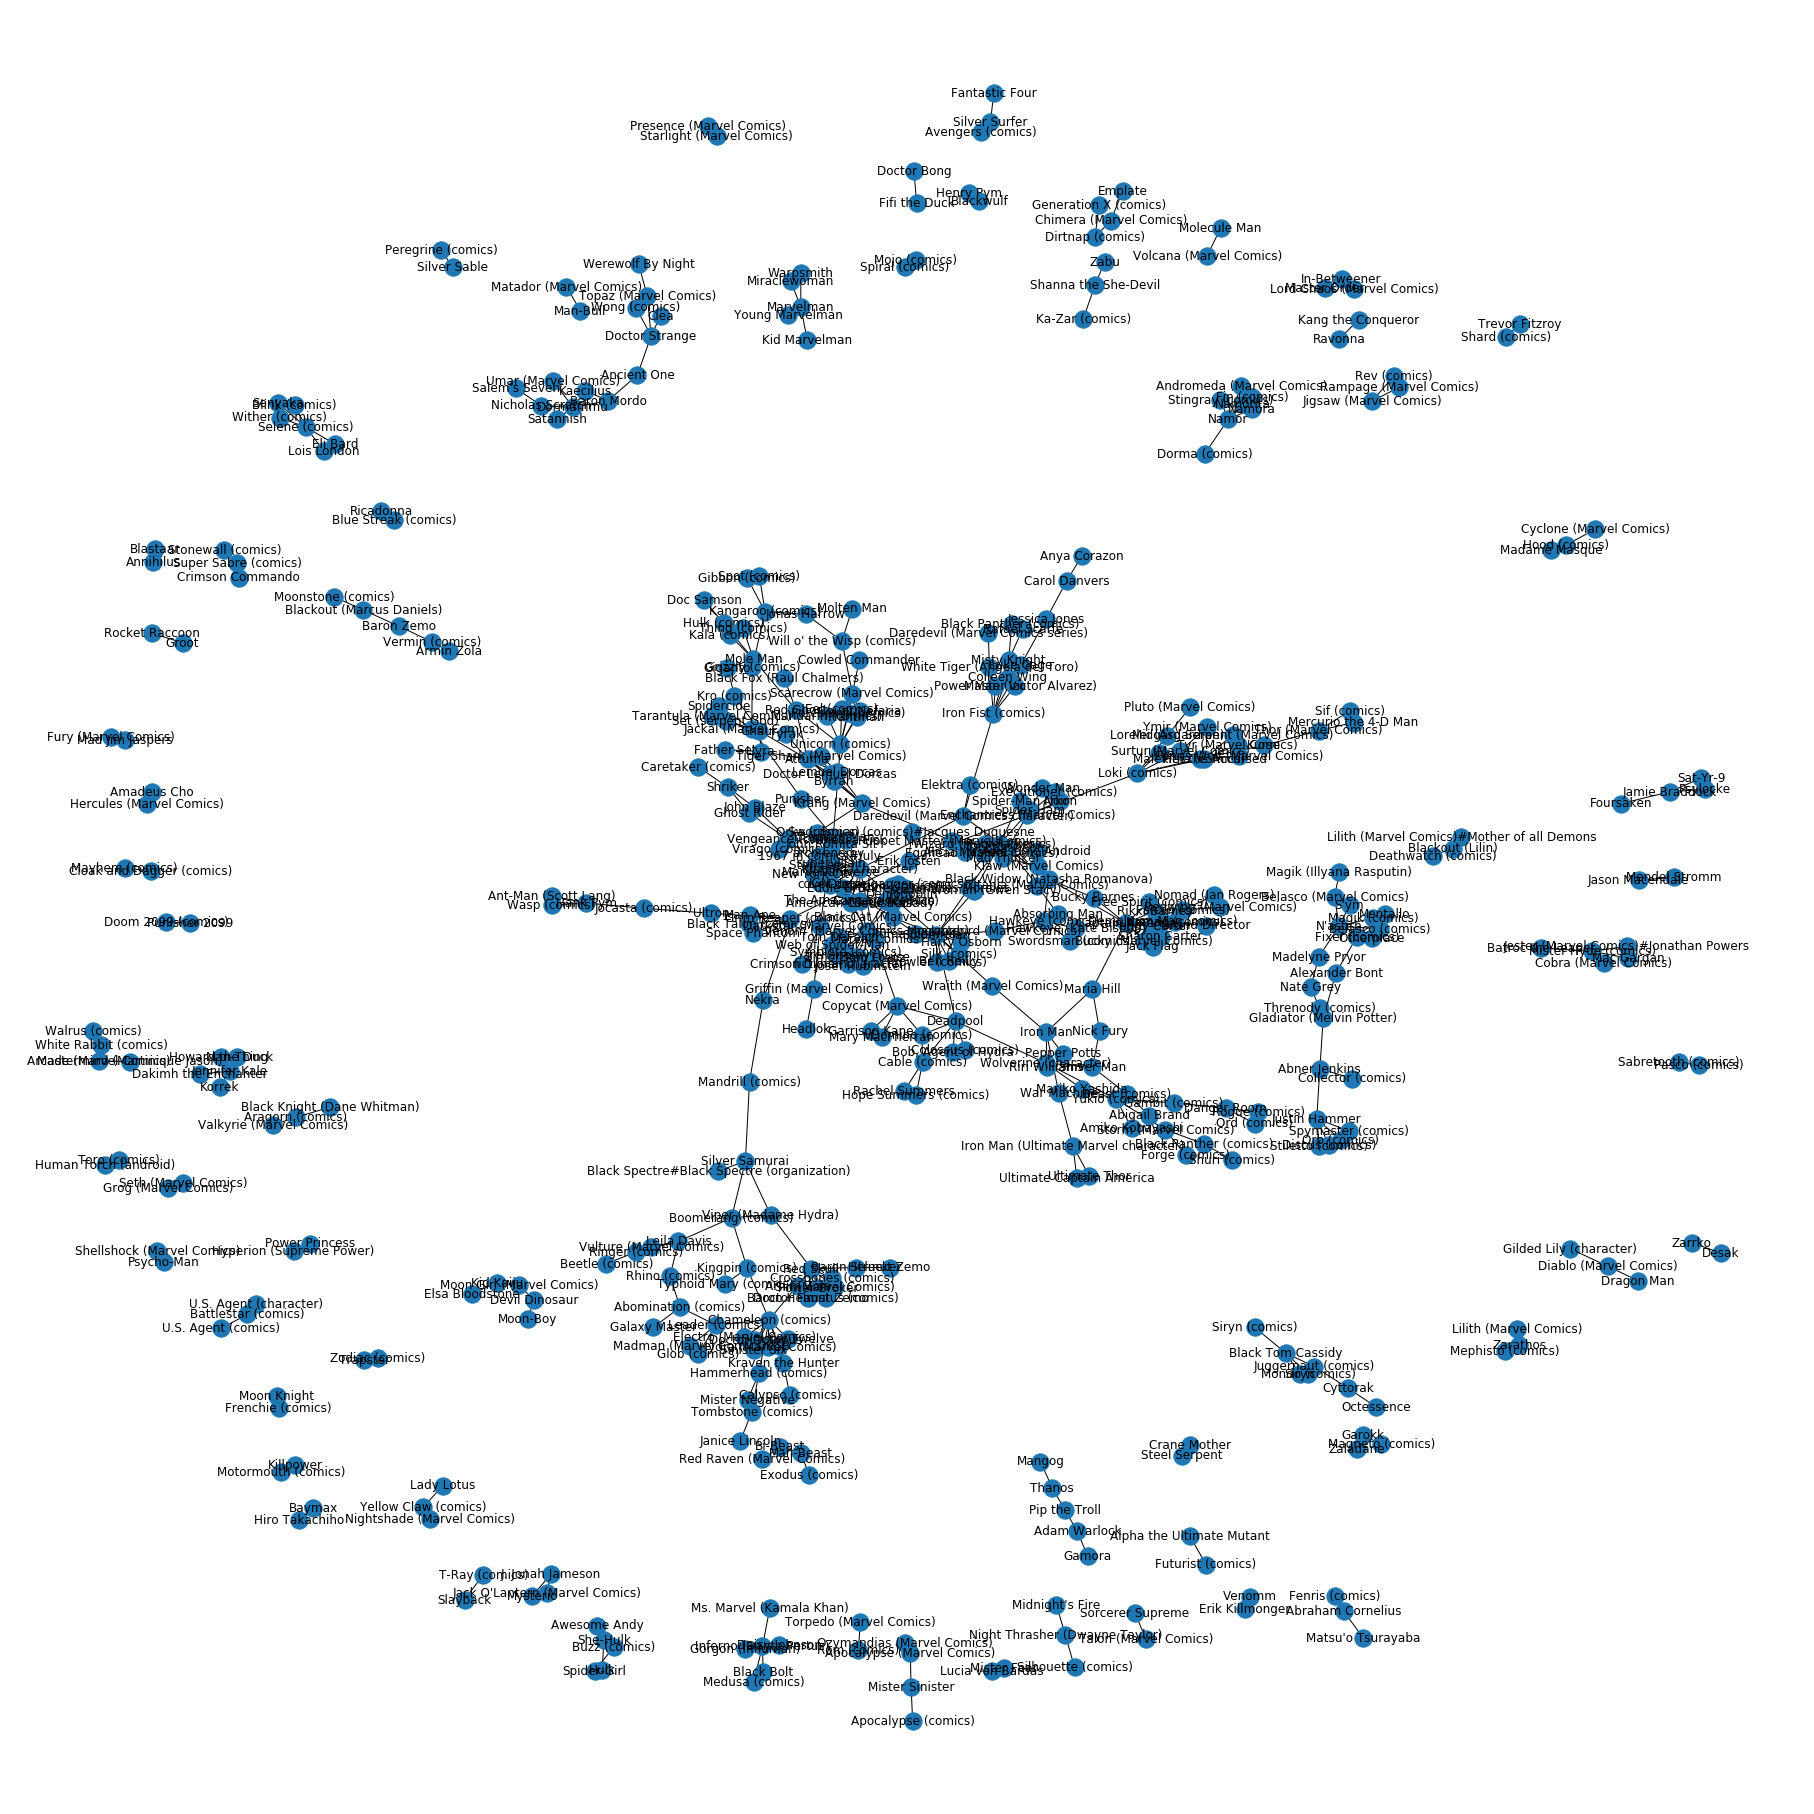

In [231]:
plt.figure (figsize =(25,25))
nx.draw(G, with_labels=True)
plt.show()

> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

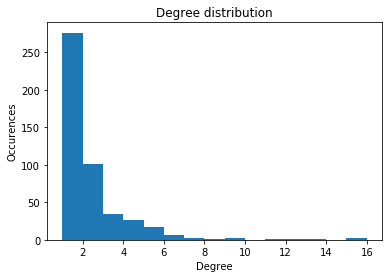

In [28]:
deg_dist = sorted([d for x, d in G.degree()], reverse=True)
plt.hist(deg_dist, bins=15)
plt.xlabel("Degree")
plt.ylabel("Occurences")
plt.title("Degree distribution")
plt.show()

<div class="alert alert-block alert-info">
<b>ANS 6.2.3 </b>  
    
Barabási–Albert Network
    
</div>

> **Ex: 6.2.7**: Let's make a nice plot of the network.I built a Python library called Netwulf (go `pip install netwulf`) that allows you to interactively plot networks in Python. Go ahead and produce a beautiful looking network using that! Comment on what you see.

In [4]:
### import networkx as nx
from netwulf import visualize

# beautifulNet = nx.watts_strogatz_graph(10, 2, 0.1)
# beautifulNet = nx.random_lobster(50, 0.9, 0.9)
beautifulNet = nx.Graph()
beautifulNet.add_nodes_from([1, 5])
beautifulNet.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), 
                             (1, 3), (3, 5), (5, 2), (2, 4), (4, 1)])

visualize(beautifulNet)

(None, None)

<div class="alert alert-block alert-info">
<b>ANS 6.2.7 </b>  

Comment: Our beautiful network looks like a star!!
    
    
</div>